In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [3]:
matches_df = pd.read_csv("epl_matches_15.csv")
matches_df.head()

,Unnamed: 0,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,...,away_team.away_team_name,away_team.managers,competition_stage.id,competition_stage.name,stadium.id,stadium.name,referee.id,referee.name,referee.country.id,referee.country.name
0,1,3754058,2016-01-02,16:00:00.000,0,0,available,2021-10-29T23:44:19.940296,20,2,...,AFC Bournemouth,"38, Eddie Howe, NA, 1977-11-29, 68, England",1,Regular Season,20,King Power Stadium,5,Andre Marriner,68,England
1,2,3754245,2015-10-17,16:00:00.000,1,0,available,2022-12-01T13:09:17.044015,9,2,...,Sunderland,"561, Sam Allardyce, NA, 1954-10-19, 68, England",1,Regular Season,33,The Hawthorns,4,Martin Atkinson,68,England
2,3,3754136,2015-12-19,18:30:00.000,1,1,available,2020-11-12T23:48:19.757269,17,2,...,Aston Villa,"92, Rémi Garde, NA, 1966-04-03, 78, France",1,Regular Season,4674,St. James'' Park,4,Martin Atkinson,68,England
3,4,3754037,2016-04-30,16:00:00.000,2,1,available,2021-07-07T17:59:57.456,36,2,...,AFC Bournemouth,"38, Eddie Howe, NA, 1977-11-29, 68, England",1,Regular Season,12,Goodison Park,7,Neil Swarbrick,68,England
4,5,3754039,2016-02-13,16:00:00.000,1,2,available,2021-07-25T18:09:51.386,26,2,...,Watford,"236, Enrique Sánchez Flores, Quique Sánchez Fl...",1,Regular Season,37,Selhurst Park,9,Robert Madley,68,England


In [4]:
events_df = pd.read_csv("epl_event_data_15.csv")
events_df.head()

,id,index,period,timestamp,minute,second,possession,player_possession,duration,related_events,...,pass.end_location,dribble.outcome.id,dribble.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,carry.end_location,duel.outcome.id,duel.outcome.name,competition_id,match_id
0,9153e9f4-f69c-4e04-8f64-505592e212cd,1,1,00:00:00.000,0,0,1,1,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3754058
1,3fbcf4e7-94d1-485a-be85-fd26a6af0318,2,1,00:00:00.000,0,0,1,2,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3754058
2,06a9a4dc-d9c9-40f6-bd89-437ba7fe682d,3,1,00:00:00.000,0,0,1,3,0.000000,100362ee-9311-4187-bd8a-0201d9db2565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3754058
3,100362ee-9311-4187-bd8a-0201d9db2565,4,1,00:00:00.000,0,0,1,4,0.000000,06a9a4dc-d9c9-40f6-bd89-437ba7fe682d,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3754058
4,2ca23eea-a984-47e4-8243-8f00880ad1c9,5,1,00:00:01.753,0,1,2,5,0.308263,1f98c89e-2326-4200-8c12-a987fdbbaf2e,...,"60.4, 43.6",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3754058


In [5]:
matches_df.shape

(380, 28)

In [6]:
events_df.shape

(1313783, 49)

In [7]:
matches_df.loc[matches_df['match_status'] == 'available'].shape[0]

380

In [8]:
events_df.match_id.nunique()

380

* 2015-16 full season event data available

In [9]:
matches_df.columns

Index(['Unnamed: 0', 'match_id', 'match_date', 'kick_off', 'home_score',
       'away_score', 'match_status', 'last_updated', 'match_week',
       'competition.competition_id', 'competition.country_name',
       'competition.competition_name', 'season.season_id',
       'season.season_name', 'home_team.home_team_id',
       'home_team.home_team_name', 'home_team.managers',
       'away_team.away_team_id', 'away_team.away_team_name',
       'away_team.managers', 'competition_stage.id', 'competition_stage.name',
       'stadium.id', 'stadium.name', 'referee.id', 'referee.name',
       'referee.country.id', 'referee.country.name'],
      dtype='object')

In [10]:
events_df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'player_possession', 'duration', 'related_events', 'location',
       'under_pressure', 'counterpress', 'type.id', 'type.name',
       'possession_team.id', 'possession_team.name', 'play_pattern.id',
       'play_pattern.name', 'team.id', 'team.name', 'tactics.formation',
       'tactics.lineup', 'player.id', 'player.name', 'position.id',
       'position.name', 'pass.length', 'pass.angle', 'pass.height.id',
       'pass.height.name', 'pass.body_part.id', 'pass.body_part.name',
       'pass.type.id', 'pass.type.name', 'pass.outcome.id',
       'pass.outcome.name', 'pass.receipient.id', 'pass.recipient.name',
       'pass.end_location', 'dribble.outcome.id', 'dribble.outcome.name',
       'ball_receipt.outcome.id', 'ball_receipt.outcome.name',
       'carry.end_location', 'duel.outcome.id', 'duel.outcome.name',
       'competition_id', 'match_id'],
      dtype='object')

* Along with event information we also have the qualifier information for a type of event

In [11]:
events_df['type.name'].value_counts()

type.name
Pass                 368619
Ball Receipt*        340324
Carry                276949
Pressure             115402
Ball Recovery         40943
Duel                  32290
Clearance             21645
Block                 14839
Dribble               13721
Goal Keeper           11777
Miscontrol            10786
Dispossessed          10520
Shot                   9908
Foul Committed         9512
Foul Won               9112
Interception           8920
Dribbled Past          8771
Substitution           2109
Half Start             1520
Half End               1520
Injury Stoppage        1032
Starting XI             760
Tactical Shift          625
50/50                   559
Shield                  503
Referee Ball-Drop       272
Bad Behaviour           193
Error                   178
Player Off              145
Player On               144
Offside                 109
Own Goal Against         38
Own Goal For             38
Name: count, dtype: int64

The goal is to predict **Did the player win a foul after recieving or recovering the ball during a possession ?**

This implies :

    (a) Identify the player who recieved (ball reciept) or recovered (ball recovery) the ball
    (b) Identify a foul
    (c) "during a possession" strongly implies that we need identify possession chains

# Possessions Started

In [21]:
possessions_started_mask = events_df['type.name'].isin(['Ball Recovery', 'Ball Receipt*'])

possessions_started = events_df.loc[
    possessions_started_mask
    , 'player.name'
].value_counts()

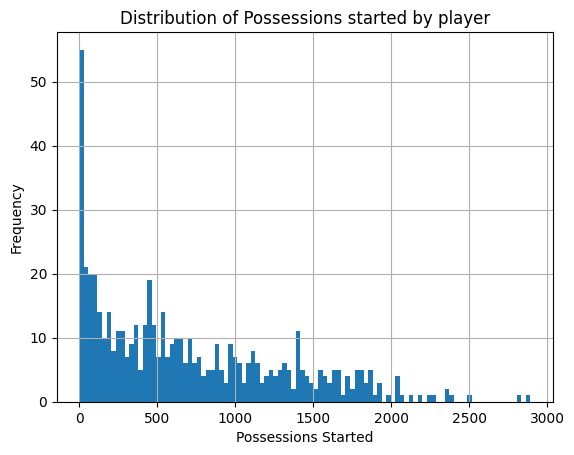

In [22]:
possessions_started.hist(bins=100)
plt.title("Distribution of Possessions started by player")
plt.xlabel("Possessions Started")
plt.ylabel("Frequency")
plt.show()

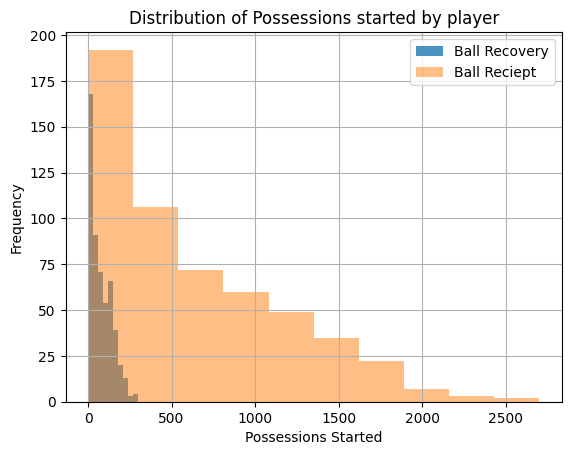

In [61]:
events_df.loc[events_df['type.name']=='Ball Recovery', 'player.name'].value_counts().hist(alpha=0.8, label='Ball Recovery')
events_df.loc[events_df['type.name']=='Ball Receipt*', 'player.name'].value_counts().hist(alpha=0.5, label='Ball Reciept')
plt.title("Distribution of Possessions started by player")
plt.xlabel("Possessions Started")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [23]:
possessions_started_by_position = events_df.loc[
    possessions_started_mask
    , 'position.name'
].value_counts()

In [25]:
possessions_started_by_position

position.name
Center Forward               36106
Left Back                    30411
Right Back                   30402
Center Attacking Midfield    29265
Left Wing                    25827
Right Wing                   25799
Left Center Back             25405
Right Center Back            24893
Left Defensive Midfield      21172
Right Defensive Midfield     20994
Left Center Midfield         19968
Right Center Midfield        19636
Right Midfield               13917
Left Midfield                13473
Goalkeeper                   11922
Right Center Forward          9673
Left Center Forward           9331
Center Defensive Midfield     8083
Right Wing Back               1413
Left Wing Back                1356
Center Back                    874
Right Attacking Midfield       677
Left Attacking Midfield        652
Center Midfield                 18
Name: count, dtype: int64

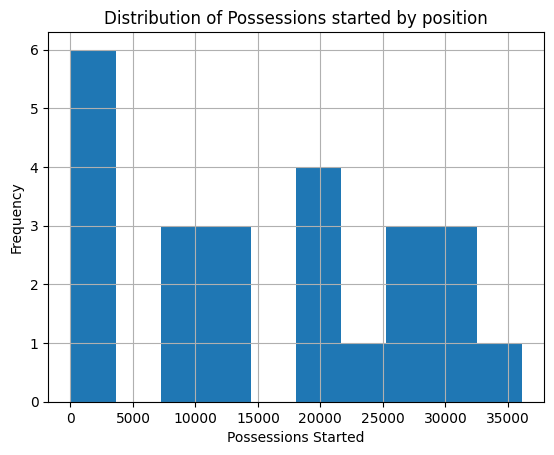

In [26]:
possessions_started_by_position.hist()
plt.title("Distribution of Possessions started by position")
plt.xlabel("Possessions Started")
plt.ylabel("Frequency")
plt.show()

# Fouls Won

In [14]:
# winning a foul 

foul_won_mask = events_df['type.name'] == 'Foul Won'

foul_won_events = events_df[foul_won_mask]

Text(0.5, 1.0, 'Distribution of how many times a player won a foul')

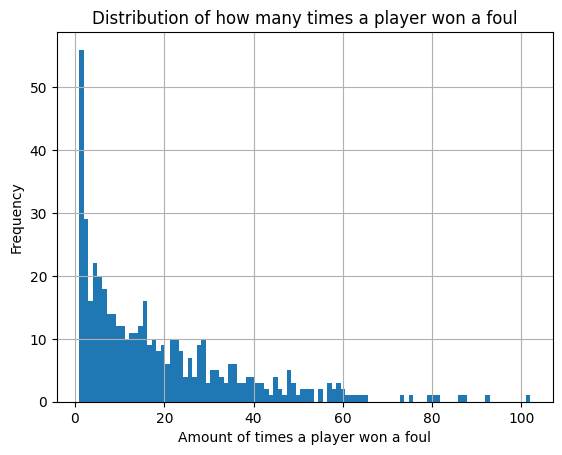

In [47]:
foul_won_events['player.name'].value_counts().hist(bins=100)
plt.xlabel('Amount of times a player won a foul')
plt.ylabel('Frequency')
plt.title('Distribution of how many times a player won a foul')

# Player recived or recovered the ball & won the foul

In [29]:
possession_initiated_by_player = events_df.loc[
    events_df['type.name'].isin(['Ball Recovery', 'Ball Receipt*'])
    , 'player.name'
].value_counts()

possession_initiated_by_player.shape

(548,)

In [30]:
fouls_won_by_player = events_df.loc[
    events_df['type.name'] == 'Foul Won'
    , 'player.name'
].value_counts()

fouls_won_by_player.shape

(480,)

In [31]:
conversion_df = possession_initiated_by_player.to_frame(name='possessions_started').join(
    fouls_won_by_player.to_frame(name='fouls_won')
    , on='player.name'
    , how='left'
).fillna(0)
conversion_df.head()

,possessions_started,fouls_won
player.name,,
Francesc Fàbregas i Soler,2892,51.0
Mesut Özil,2832,53.0
Aaron Ramsey,2494,57.0
Troy Deeney,2386,45.0
Romelu Lukaku Menama,2364,35.0


In [32]:
# conversion rate

conversion_df['conversion_rate'] = conversion_df['fouls_won']/conversion_df['possessions_started']
conversion_df.head()

,possessions_started,fouls_won,conversion_rate
player.name,,,
Francesc Fàbregas i Soler,2892,51.0,0.017635
Mesut Özil,2832,53.0,0.018715
Aaron Ramsey,2494,57.0,0.022855
Troy Deeney,2386,45.0,0.018860
Romelu Lukaku Menama,2364,35.0,0.014805


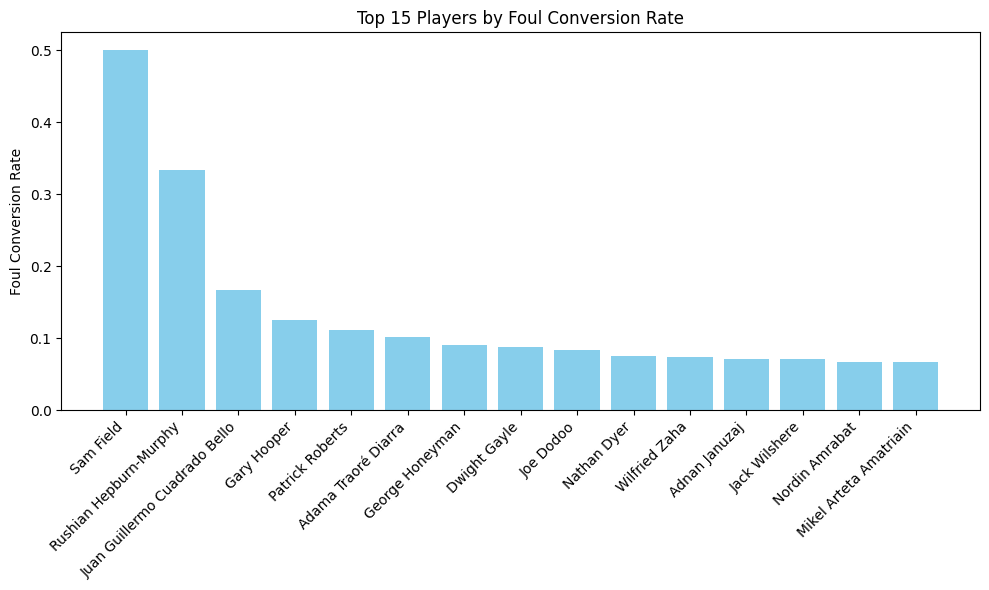

In [36]:
plt.figure(figsize=(10, 6))
top_converters = conversion_df.sort_values('conversion_rate', ascending=False).head(15)

plt.bar(top_converters.index, top_converters['conversion_rate'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Foul Conversion Rate')
plt.title('Top 15 Players by Foul Conversion Rate')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of possessions started by a player')

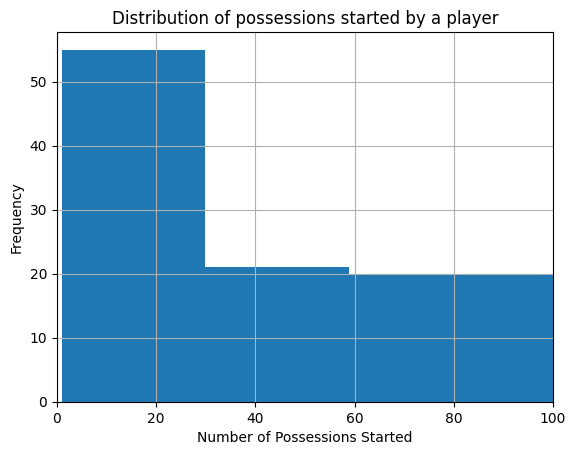

In [53]:
conversion_df['possessions_started'].hist(bins=100)
plt.xlabel('Number of Possessions Started')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.title('Distribution of possessions started by a player')

We need to filter our players with low possessions started to get an accurate view of conversion rate

In [63]:
filter_possessions_started = conversion_df['possessions_started'] > 30

In [64]:
filtered_conversion_df = conversion_df.loc[filter_possessions_started, :]

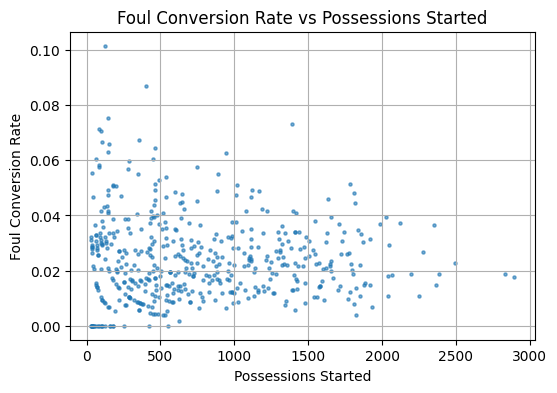

In [65]:
plt.figure(figsize=(6,4))
plt.scatter(
    filtered_conversion_df['possessions_started']
    , filtered_conversion_df['conversion_rate']
    , alpha=0.6
    , s=5
)
plt.xlabel("Possessions Started")
plt.ylabel("Foul Conversion Rate")
plt.title("Foul Conversion Rate vs Possessions Started")
plt.grid(True)
plt.show()

In [66]:
# add player position information

filtered_conversion_df = filtered_conversion_df.merge(
    events_df.groupby('player.name')['position.name'].agg(lambda x: x.value_counts().index[0]) # mode
    , how='left'
    , on='player.name'
)

filtered_conversion_df.head()

,possessions_started,fouls_won,conversion_rate,position.name
player.name,,,,
Francesc Fàbregas i Soler,2892,51.0,0.017635,Right Defensive Midfield
Mesut Özil,2832,53.0,0.018715,Center Attacking Midfield
Aaron Ramsey,2494,57.0,0.022855,Left Defensive Midfield
Troy Deeney,2386,45.0,0.018860,Right Center Forward
Romelu Lukaku Menama,2364,35.0,0.014805,Center Forward


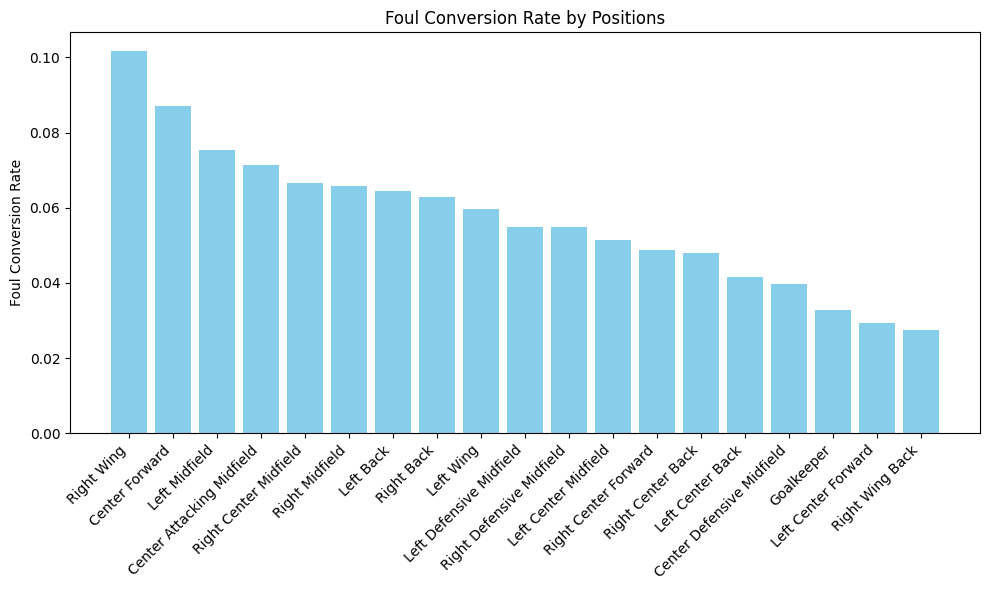

In [67]:
# top_converters = conversion_df[conversion_df['possessions_started'] >= 20]  # filter for stability
top_converters = filtered_conversion_df.sort_values('conversion_rate', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(top_converters['position.name'], top_converters['conversion_rate'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Foul Conversion Rate')
plt.title('Foul Conversion Rate by Positions')
plt.tight_layout()
plt.show()

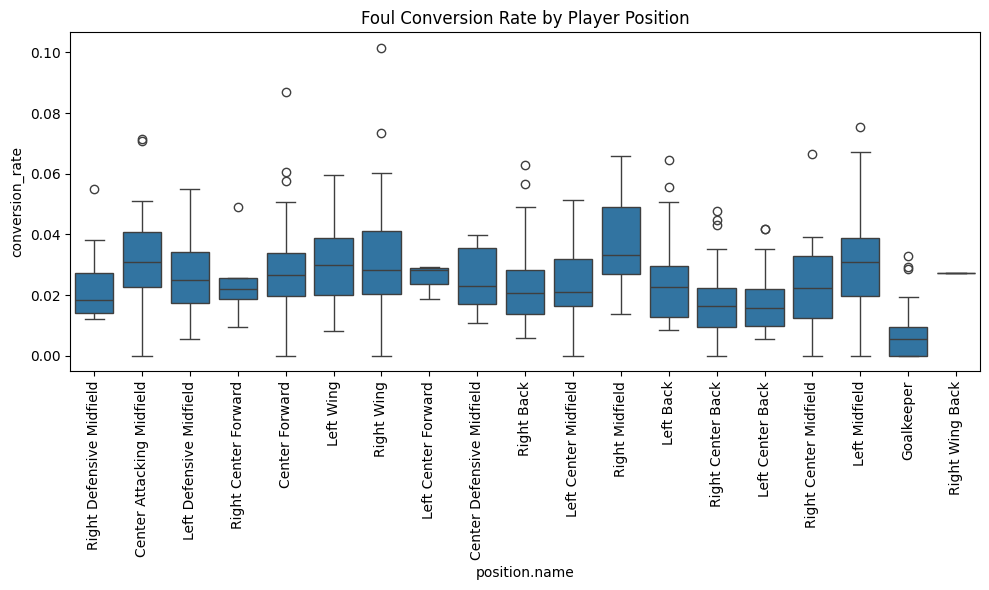

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_conversion_df, x='position.name', y='conversion_rate')
plt.xticks(rotation=90)
plt.title("Foul Conversion Rate by Player Position")
plt.tight_layout()
plt.show()

In [68]:
def normalize_position(pos):
    pos = str(pos).lower()
    if any(term in pos for term in ['back', 'defender']):
        return 'Defense'
    elif any(term in pos for term in ['midfield']):
        return 'Midfield'
    elif any(term in pos for term in ['wing', 'forward', 'attacking']):
        return 'Attack'
    else:
        return 'Goalkeeper'  # goalkeeper

filtered_conversion_df['position_group'] = filtered_conversion_df['position.name'].apply(normalize_position)

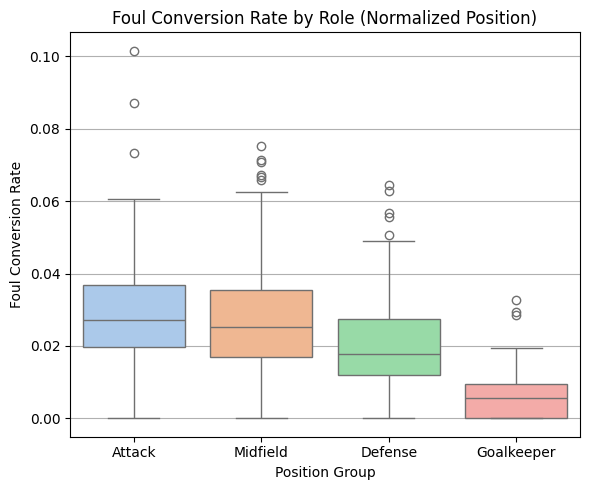

In [70]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=filtered_conversion_df.sort_values('conversion_rate', ascending=False), x='position_group', y='conversion_rate', hue='position_group', palette='pastel')
plt.title("Foul Conversion Rate by Role (Normalized Position)")
plt.ylabel("Foul Conversion Rate")
plt.xlabel("Position Group")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()